In [939]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# DATA EXPLORATION

In [940]:
  df=pd.read_csv("/content/Customers.csv")
  df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [941]:
df.tail()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2
1999,2000,Male,90,110610,52,Entertainment,5,2


In [942]:
df.shape

(2000, 8)

In [943]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [944]:
df.describe().round(2)

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,1000.50,48.96,110731.82,50.96,4.10,3.77
std,577.49,28.43,45739.54,27.93,3.92,1.97
min,1.00,0.00,0.00,0.00,0.00,1.00
25%,500.75,25.00,74572.00,28.00,1.00,2.00
50%,1000.50,48.00,110045.00,50.00,3.00,4.00
75%,1500.25,73.00,149092.75,75.00,7.00,5.00
max,2000.00,99.00,189974.00,100.00,17.00,9.00


<Axes: >

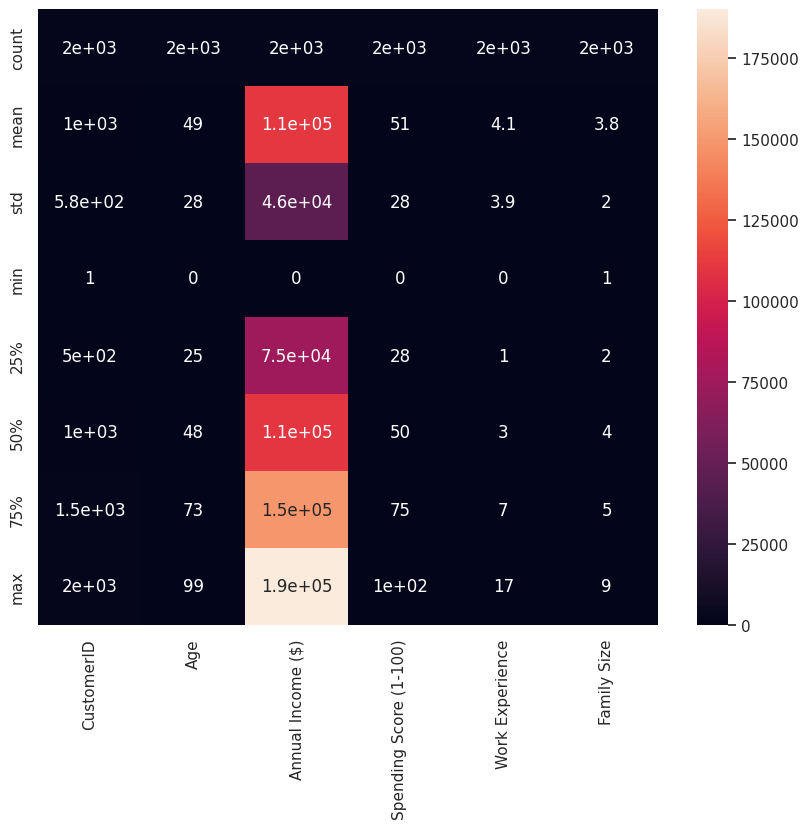

In [945]:
plt.figure(figsize=(10,8))
sns.heatmap(df.describe().round(2),annot=True)

In [946]:
df['Annual Income ($)'].unique()

array([ 15000,  35000,  86000, ...,  90961, 182109, 110610])

In [947]:
df['Family Size'].unique()

array([4, 3, 1, 2, 6, 5, 8, 7, 9])

In [948]:
df['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [949]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

#DATA WRANGLING

In [950]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income ($),0
Spending Score (1-100),0
Profession,35
Work Experience,0
Family Size,0


In [951]:
df['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [952]:
df['Profession'].value_counts()

,count
Profession,
Artist,612
Healthcare,339
Entertainment,234
Engineer,179
Doctor,161
Executive,153
Lawyer,142
Marketing,85
Homemaker,60


In [953]:
df[df['Profession'].isna()]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
79,80,Female,49,98000,42,NaN,1,1
118,119,Female,51,84000,43,NaN,2,7
219,220,Female,59,76000,61,NaN,9,1
237,238,Male,95,36000,35,NaN,0,4
437,438,Male,76,136259,14,NaN,0,7
440,441,Female,0,57373,29,NaN,0,7
498,499,Male,95,121725,3,NaN,12,3
545,546,Female,89,107359,26,NaN,10,6
601,602,Male,61,126370,20,NaN,11,4
641,642,Male,66,121377,19,NaN,7,7


In [954]:
df['Profession']=df['Profession'].fillna(df['Profession'].mode()[0])

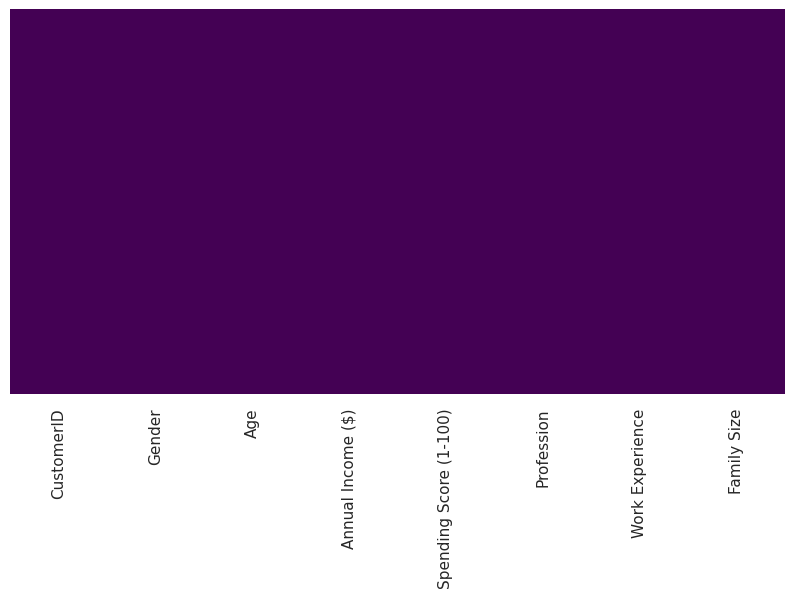

In [955]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [956]:
df.duplicated().sum()

np.int64(0)

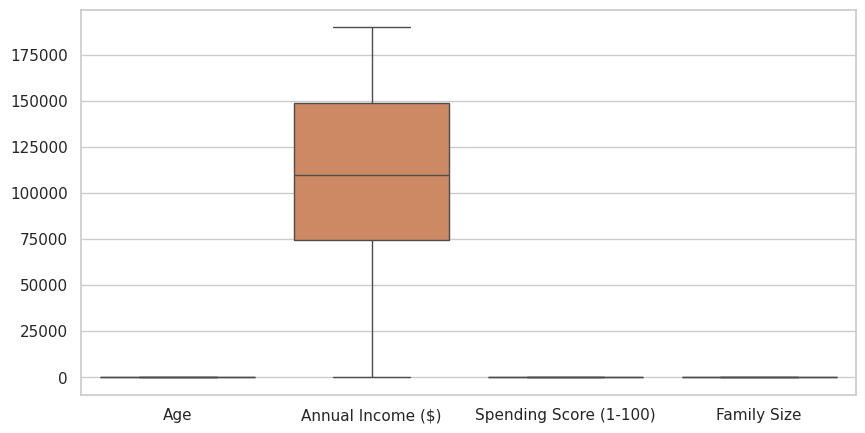

In [957]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['Age','Annual Income ($)','Spending Score (1-100)','Family Size']])
plt.show()

In [958]:
df.drop(columns=['CustomerID'],inplace=True)

# EDA

<Figure size 1500x1000 with 0 Axes>

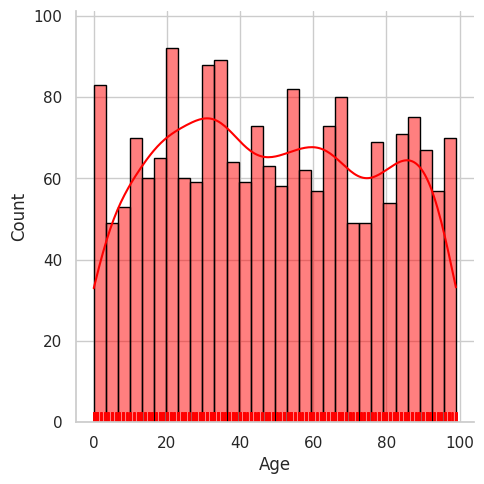

In [959]:
plt.figure(figsize=(15,10))
sns.displot(data=df,x='Age',kde=True,bins=30,color='red',edgecolor='black',linewidth=1,fill=True,alpha=0.5,rug=True)
plt.show()

# first problem

<ipython-input-960-aa8bc27348f9>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df,x='Age',y='Annual Income ($)',palette='viridis',edgecolor='black',linewidth=1) # Removed saturation


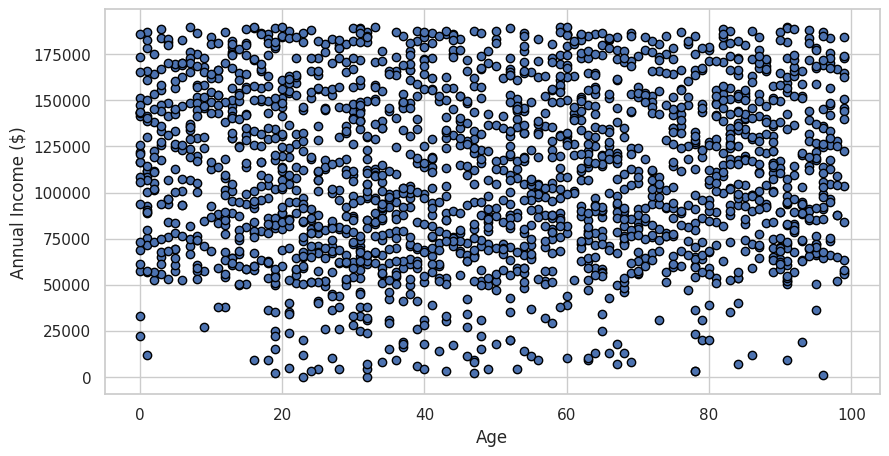

In [960]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='Age',y='Annual Income ($)',palette='viridis',edgecolor='black',linewidth=1) # Removed saturation
plt.show()

#2nd problem

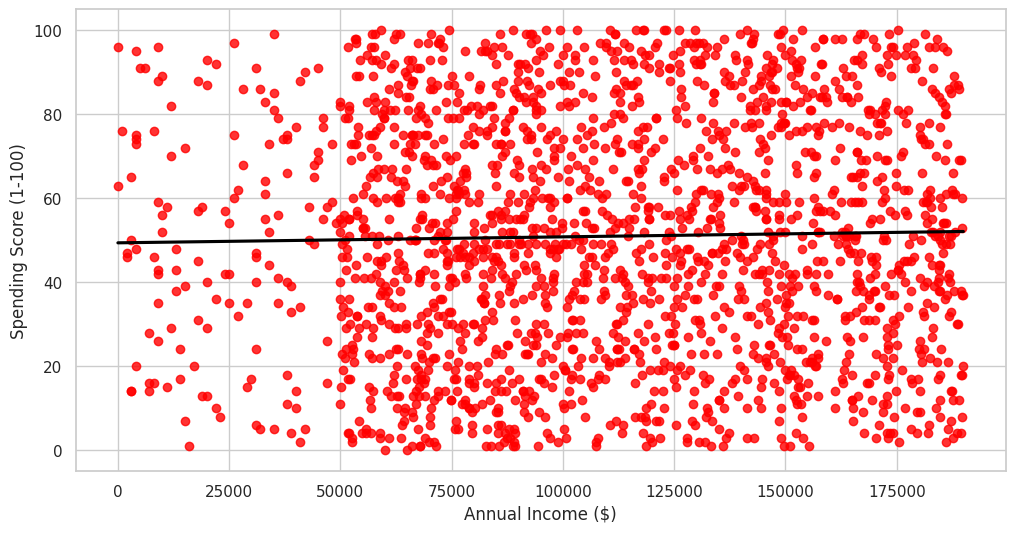

In [961]:
plt.figure(figsize=(12,6))
sns.regplot(data=df,x='Annual Income ($)',y='Spending Score (1-100)',scatter_kws={'color':'red'},line_kws={'color':'black'},ci=None)
plt.show()

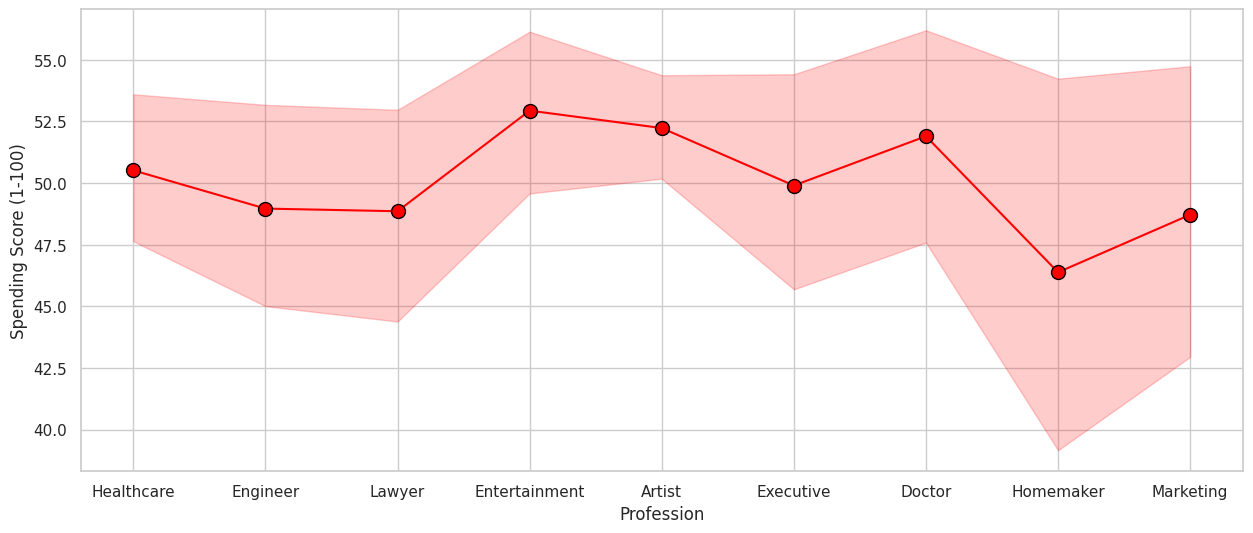

In [962]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df,x='Profession',y='Spending Score (1-100)',color='red',marker='o',markersize=10,markeredgecolor='black',markeredgewidth=1)
plt.show()

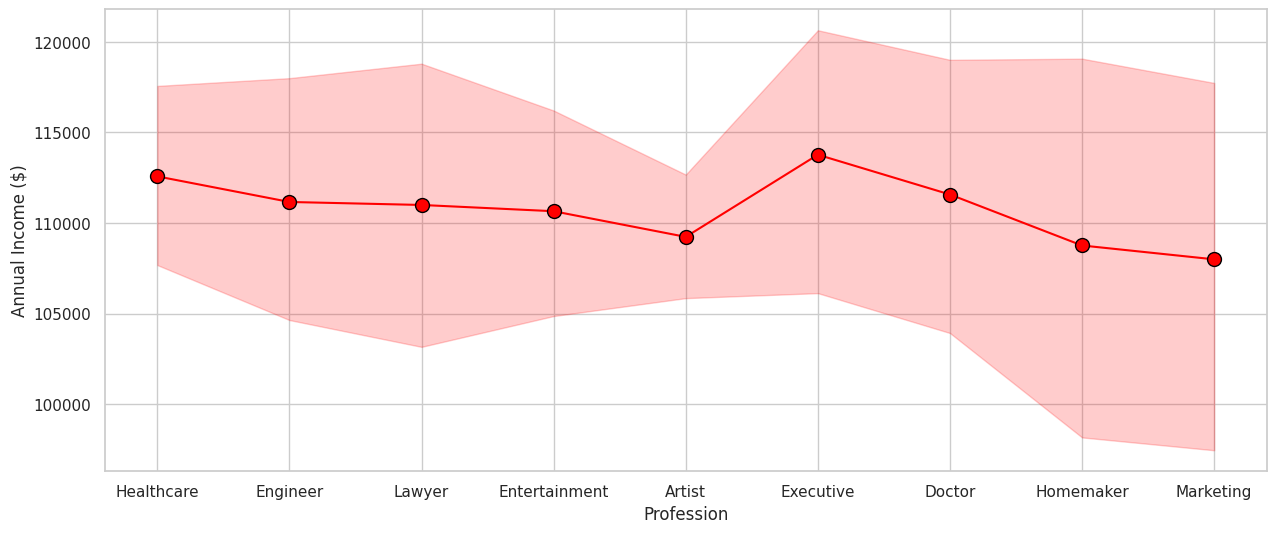

In [963]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df,x='Profession',y='Annual Income ($)',color='red',marker='o',markersize=10,markeredgecolor='black',markeredgewidth=1)
plt.show()


<Axes: xlabel='Family Size', ylabel='Annual Income ($)'>

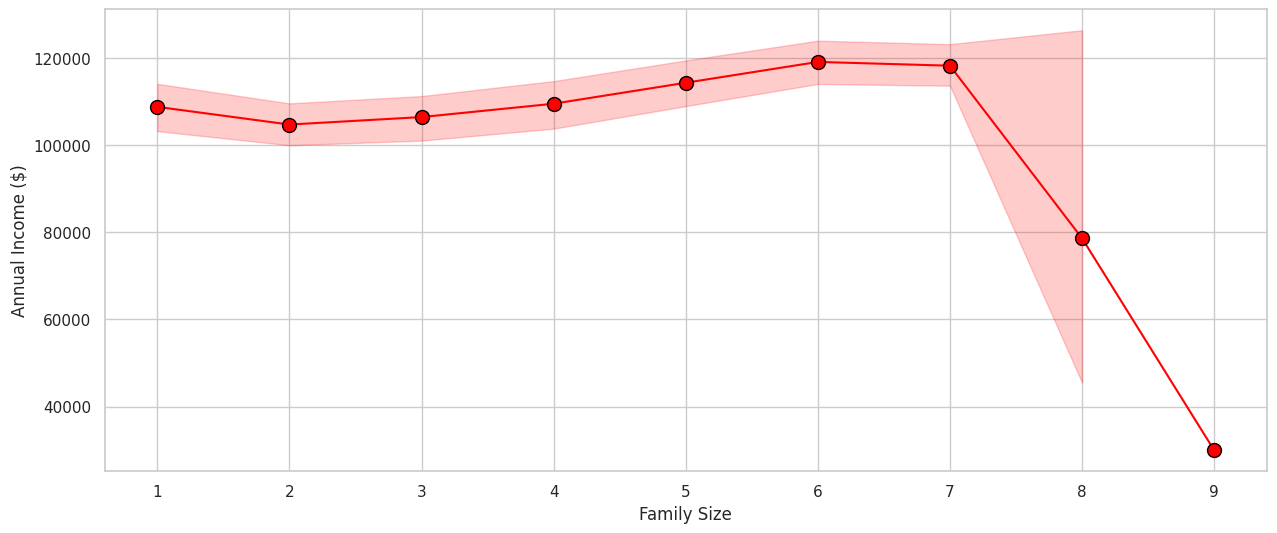

In [964]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df,x='Family Size',y='Annual Income ($)',color='red',marker='o',markersize=10,markeredgecolor='black',markeredgewidth=1)

<Axes: xlabel='Family Size', ylabel='Spending Score (1-100)'>

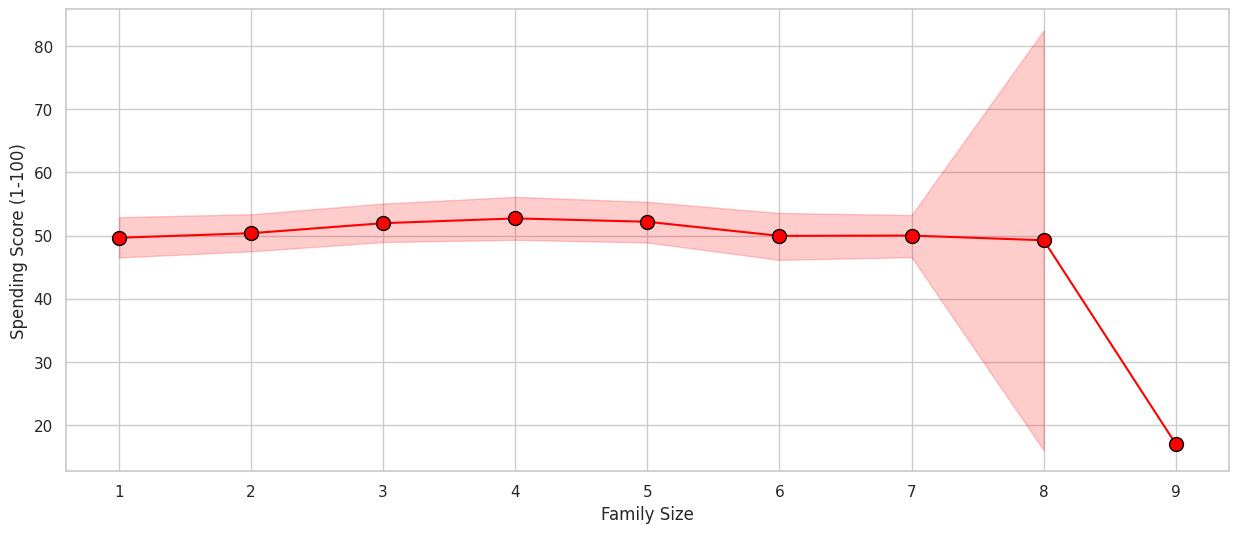

In [965]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df,x='Family Size',y='Spending Score (1-100)',color='red',marker='o',markersize=10,markeredgecolor='black',markeredgewidth=1)

In [966]:
df[df['Annual Income ($)']==df['Annual Income ($)'].max()]

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
569,Female,91,189974,37,Engineer,8,1


In [967]:
df[df['Spending Score (1-100)']==df['Spending Score (1-100)'].max()]

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
300,Male,85,153787,100,Entertainment,3,3
312,Female,24,118302,100,Lawyer,5,1
322,Female,89,110667,100,Healthcare,2,4
564,Female,51,141416,100,Healthcare,15,1
670,Male,54,59163,100,Marketing,3,3
680,Male,17,96154,100,Artist,1,4
707,Male,56,103210,100,Artist,6,6
823,Female,2,122698,100,Entertainment,8,1
906,Female,17,116463,100,Artist,8,4
1137,Male,29,118092,100,Entertainment,7,3


In [968]:
df.drop(df.index[[1626,823]],inplace=True)

In [969]:
df.sample()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
79,Female,49,98000,42,Artist,1,1


#FEATURE ENG

In [970]:
df.drop(columns=['Family Size','Work Experience','Profession'],inplace=True)

In [971]:
Scaled=df.copy()

In [972]:
ln=LabelEncoder()
sc=StandardScaler()

In [973]:
Scaled['Gender']=ln.fit_transform(df['Gender'])

In [974]:
Scaled.corr().round(2)

,Gender,Age,Annual Income ($),Spending Score (1-100)
Gender,1.00,0.01,0.01,-0.00
Age,0.01,1.00,0.02,-0.04
Annual Income ($),0.01,0.02,1.00,0.02
Spending Score (1-100),-0.00,-0.04,0.02,1.00


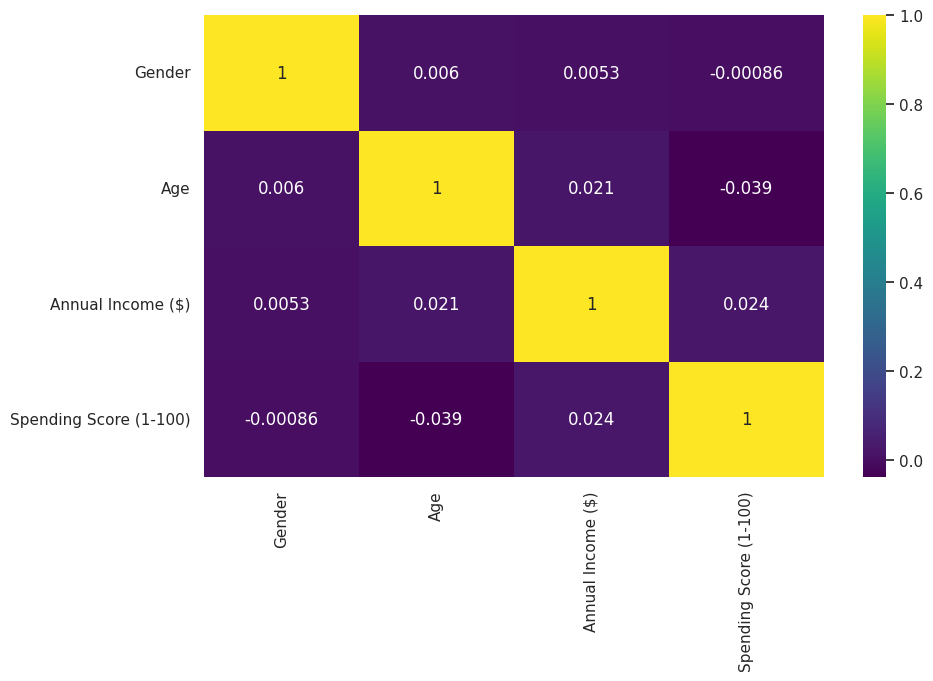

In [975]:
plt.figure(figsize=(10,6))
sns.heatmap(Scaled.corr(),annot=True,cmap='viridis')
plt.show()

In [976]:
Scaled['Age']=sc.fit_transform(df[['Age']])
Scaled['Annual Income ($)']=sc.fit_transform(df[['Annual Income ($)']])

In [977]:
Scaled.head(2)

,Gender,Age,Annual Income ($),Spending Score (1-100)
0,1,-1.056381,-2.093087,39
1,1,-0.985965,-1.655861,81


#modeling

* choose number of clusters based on knee method
* build model
* evalue model use pca
* merge cluster colum to my dataset





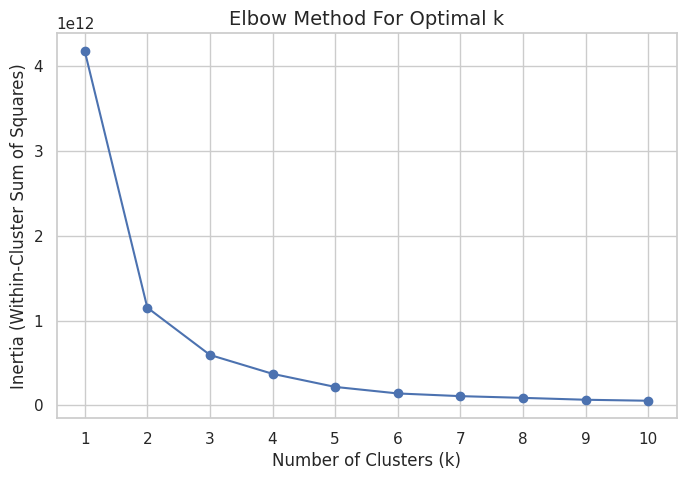

In [978]:
def plot_elbow(Scaled, max_k=10, random_state=42):
    distortions = []
    K = range(1, max_k + 1)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        kmeans.fit(df[['Age', 'Annual Income ($)', 'Spending Score (1-100)']])
        distortions.append(kmeans.inertia_)
    plt.figure(figsize=(8, 5))
    sns.set(style="whitegrid")
    plt.plot(K, distortions, 'bo-')
    plt.xlabel('Number of Clusters (k)', fontsize=12)
    plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
    plt.title('Elbow Method For Optimal k', fontsize=14)
    plt.xticks(K)
    plt.show()
plot_elbow(Scaled)

In [979]:
km=KMeans(n_clusters=3,init='k-means++',random_state=42)

In [980]:
X=Scaled.values

In [981]:
km.fit(Scaled)

KMeans(n_clusters=3, random_state=42)

In [982]:
km_labels=km.labels_
km_labels

array([2, 1, 0, ..., 0, 0, 2], dtype=int32)

In [983]:
km_centroids=km.cluster_centers_
km_centroids

array([[ 3.93890675e-01,  3.20669889e-02, -3.21668363e-02,
         1.77877814e+01],
       [ 4.00316456e-01, -8.05845691e-02,  5.02480021e-03,
         8.41724684e+01],
       [ 4.23387097e-01,  4.16448664e-02,  2.26237882e-02,
         5.03548387e+01]])

In [984]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, km_labels)
print("Silhouette Score:", score)

Silhouette Score: 0.5916033287869927


In [985]:
km.inertia_

177713.28606389253

<Figure size 3000x1500 with 0 Axes>

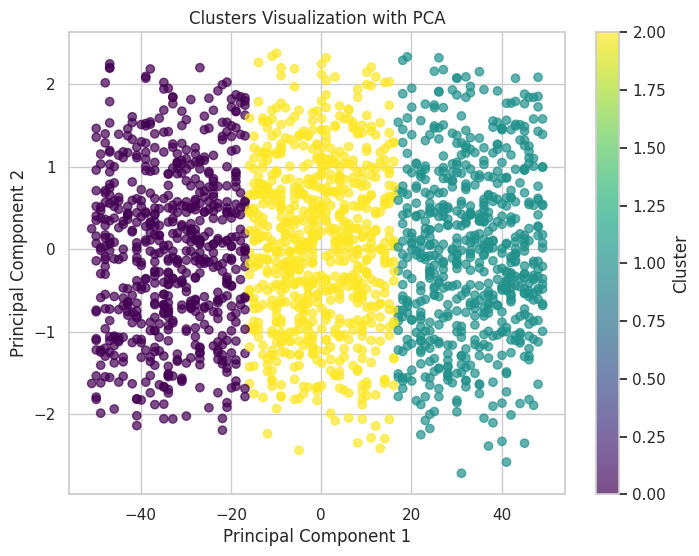

In [986]:
plt.figure(figsize=(30,15))
from sklearn.decomposition import PCA
def visualize_clusters_pca(Scaled, cluster_column, km_labels):
    temp_df = Scaled.copy()
    temp_df[cluster_column] = km_labels
    pca = PCA(n_components=2)
    pca_components = pca.fit_transform(temp_df.drop(cluster_column, axis=1))
    temp_df['PCA1'] = pca_components[:, 0]
    temp_df['PCA2'] = pca_components[:, 1]
    plt.figure(figsize=(8, 6))
    plt.scatter(temp_df['PCA1'], temp_df['PCA2'], c=temp_df[cluster_column], cmap='viridis', alpha=0.7)
    plt.title('Clusters Visualization with PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()
visualize_clusters_pca(Scaled, 'km_labels', km_labels)

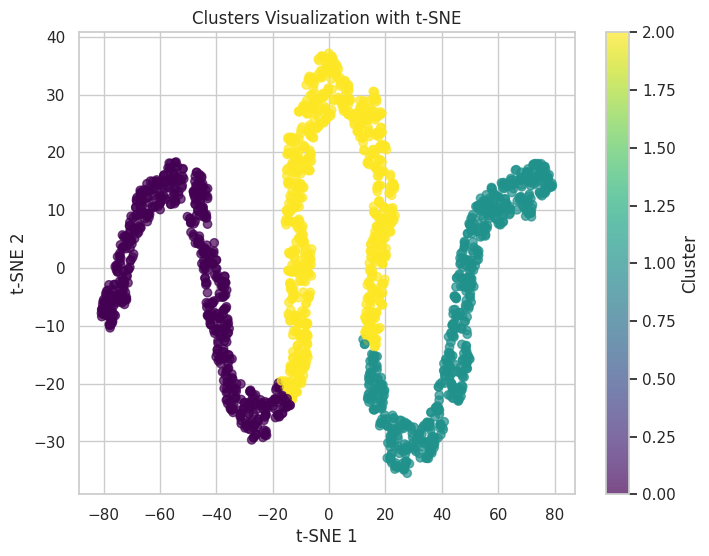

In [987]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def visualize_clusters_tsne(Scaled, cluster_column, km_labels):  # Added km_labels as an argument
    # تقليص الأبعاد باستخدام t-SNE إلى بعدين

    Scaled[cluster_column] = km_labels # Add the cluster labels as a column to the DataFrame

    tsne = TSNE(n_components=2, random_state=42)
    tsne_components = tsne.fit_transform(Scaled.drop(cluster_column, axis=1))  # قم بحذف العمود الخاص بالكلاستر
    Scaled['tSNE1'] = tsne_components[:, 0]
    Scaled['tSNE2'] = tsne_components[:, 1]

    # رسم النتائج
    plt.figure(figsize=(8, 6))
    # Changed df to Scaled to reference the correct DataFrame
    plt.scatter(Scaled['tSNE1'], Scaled['tSNE2'], c=Scaled[cluster_column], cmap='viridis', alpha=0.7)
    plt.title('Clusters Visualization with t-SNE')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.colorbar(label='Cluster')
    plt.show()

# Example usage:
visualize_clusters_tsne(Scaled, 'km_labels', km_labels)  # Pass km_labels to the function

In [988]:
df['Cluster']=km_labels

In [989]:
df.head(10)

,Gender,Age,Annual Income ($),Spending Score (1-100),Cluster
0,Male,19,15000,39,2
1,Male,21,35000,81,1
2,Female,20,86000,6,0
3,Female,23,59000,77,1
4,Female,31,38000,40,2
5,Female,22,58000,76,1
6,Female,35,31000,6,0
7,Female,23,84000,94,1
8,Male,64,97000,3,0
9,Female,30,98000,72,1


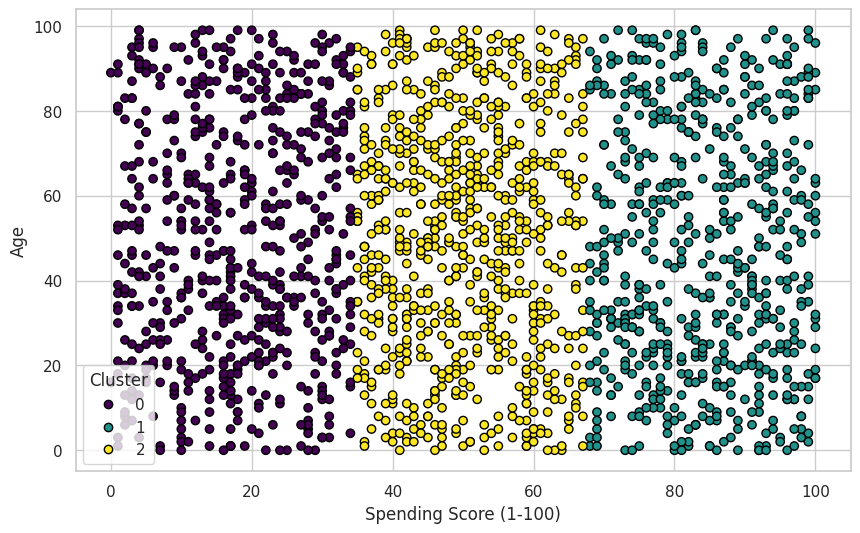

In [998]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Spending Score (1-100)',y='Age',hue='Cluster',palette='viridis',edgecolor='black',linewidth=1)
plt.show()

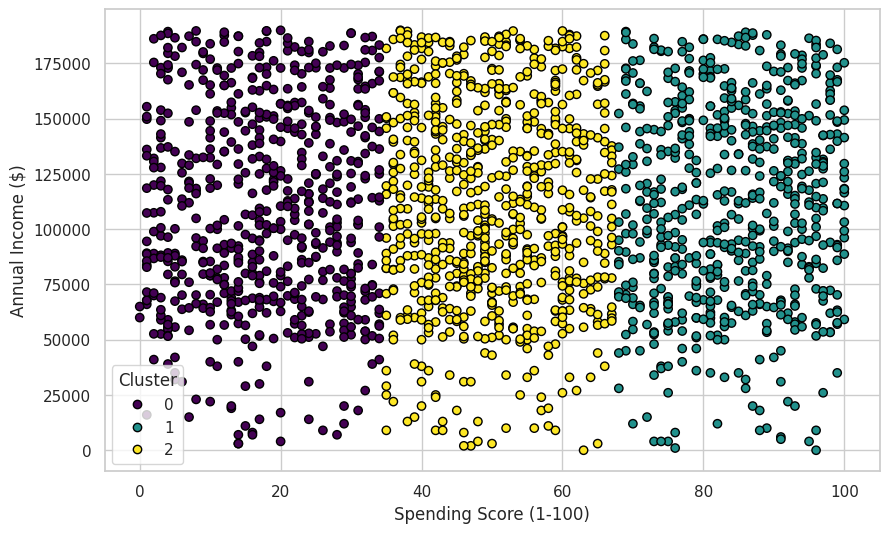

In [1000]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Spending Score (1-100)',y='Annual Income ($)',hue='Cluster',palette='viridis',edgecolor='black',linewidth=1)
plt.show()